# Regression

### Step 1: Importing necessary libraries

In [13]:
import pandas as pd
import numpy as np
import sklearn

In [14]:
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
print(sklearn.__version__)

2.2.4
2.2.3
3.13.2 (tags/v3.13.2:4f8bb39, Feb  4 2025, 15:23:48) [MSC v.1942 64 bit (AMD64)]
1.7.1


### Step2: Reading data into DF

In [15]:
df=pd.read_csv('housing.csv')
df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [16]:
# as from the above cell output can able to see there's no header and the delimeter is a space
df=pd.read_csv('housing.csv',header=None,delim_whitespace=True)
df.head()

C:\Users\sainadh\AppData\Local\Temp\ipykernel_4292\2685883730.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv('housing.csv',header=None,delim_whitespace=True)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [17]:
# py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
# \s+ Match one or more consecutive whitespace characters.
df=pd.read_csv('housing.csv',header=None,sep=r'\s+')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [18]:
# renaming columns with user defined column names
col_name=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns=col_name
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Exploratory Data Analysis

In [19]:
# resulting statistics of all int columns in the df
# by considering the mean,median,std,min,max we can assume how the data is spread across in each column 
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<function matplotlib.pyplot.show(close=None, block=None)>

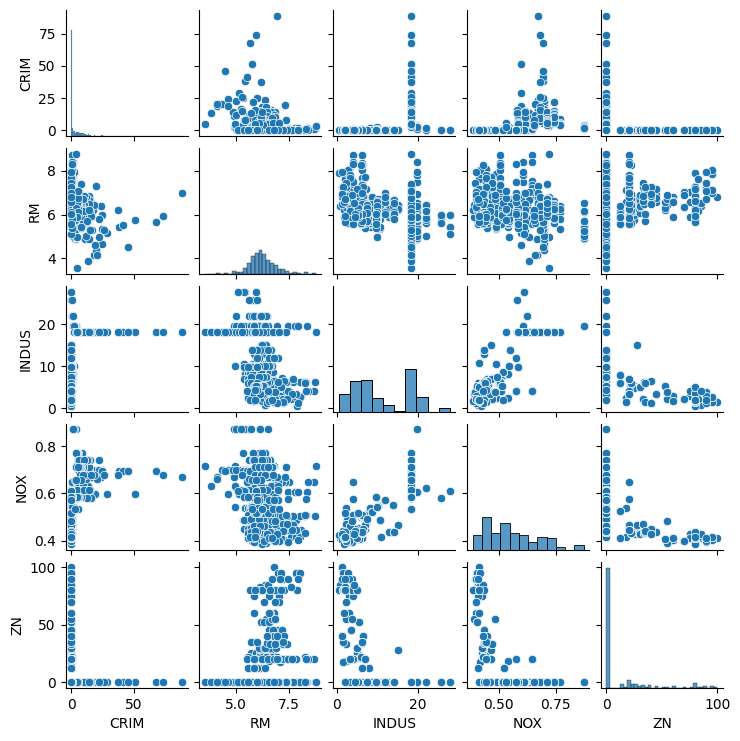

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
col=['CRIM','RM','INDUS','NOX','ZN']
sns.pairplot(df[col],height=1.5)
plt.show

Normal Distribution means
The normal distribution is to describe how data is spread out. it is a bell-shaped curve where:
+ Most values cluster around the average (mean).
+ Fewer values are found as you move further away from the average—in either direction.
+ It is symmetric, so the left and right sides are mirror images.

### Correlation Analysis and Feature Selection

In [21]:
pd.options.display.float_format='{:,.3f}'.format # setting only 3 decimal points to be highlighted
# printing out the correlation between the columns in df
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


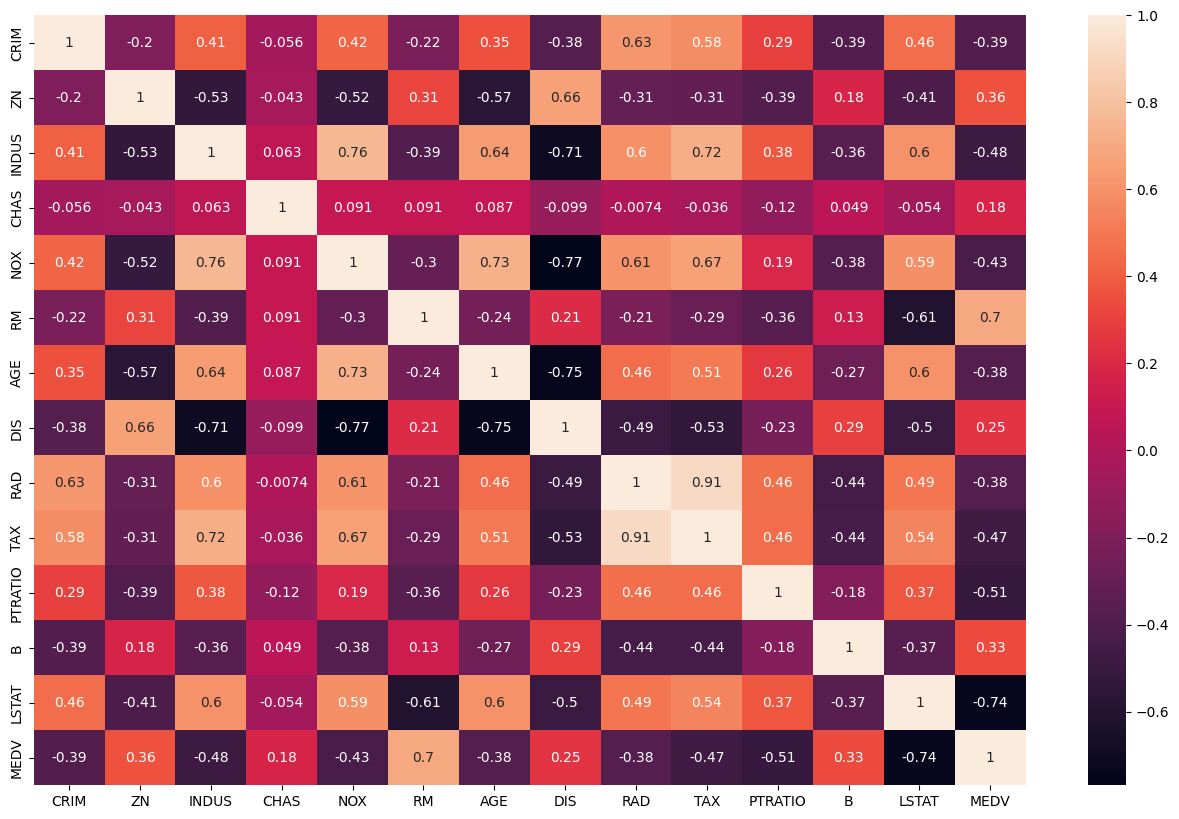

In [22]:
# visualization of the correlation
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [23]:
# to find the documentation of specific library
sns.heatmap?

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

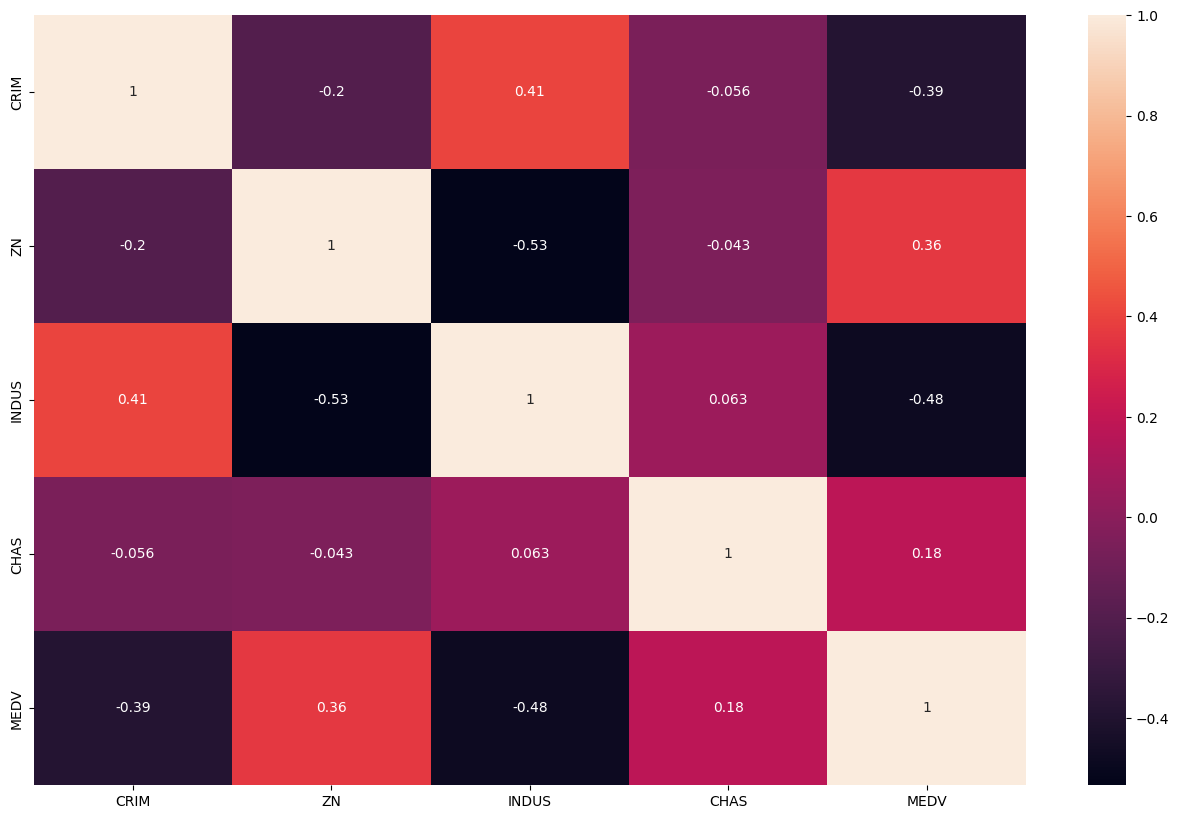

In [24]:
plt.figure(figsize=(16,10))
sns.heatmap(df[['CRIM','ZN','INDUS','CHAS','MEDV']].corr(), annot=True)
plt.show()

### Linear Regression with Scikit Learn

In [29]:
# filtering features and target variable
x=df['RM'].values.reshape(-1,1)
y=df['MEDV'].values

In [31]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[9.10210898]
-34.670620776438554


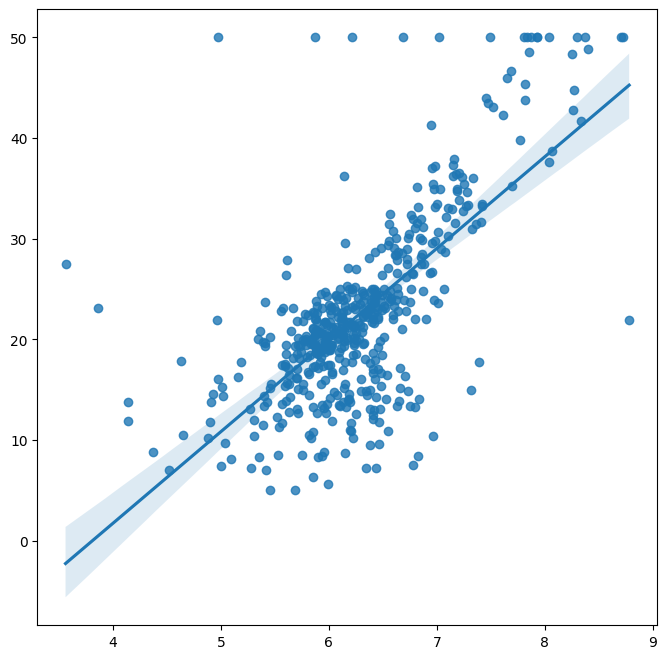

In [38]:
# Linear Regression visualization
plt.figure(figsize=(8,8))
sns.regplot(data=df,x=x,y=y)
plt.show()

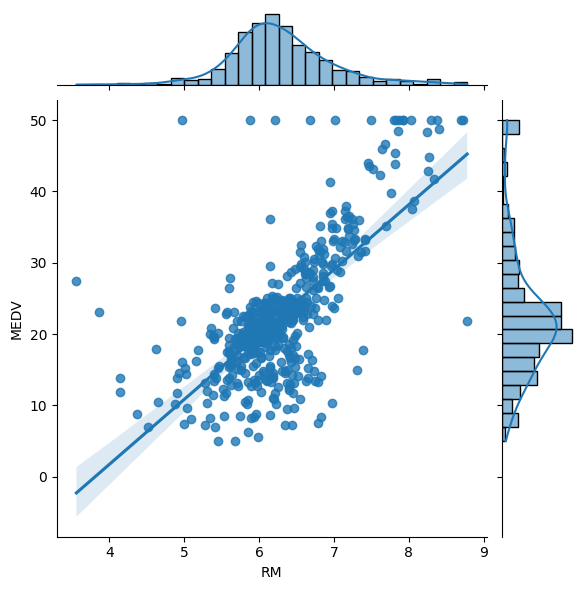

In [41]:
# Linear Regression visualization
sns.jointplot(data=df,x='RM',y='MEDV',kind='reg',height=6)
plt.show()

In [48]:
print(lin_reg.predict([[5]]))
print(lin_reg.predict(np.array([5]).reshape(1,-1)))

[10.83992413]
[10.83992413]


### Robust Regression - to deal with outliers in real world data

### RANdom SAmple Consensus (RANSAC) Algorithm

In [49]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor()
ransac.fit(x,y)

,estimator,None
,min_samples,None
,residual_threshold,None
,is_data_valid,None
,is_model_valid,None
,max_trials,100
,max_skips,inf
,stop_n_inliers,inf
,stop_score,inf
,stop_probability,0.99
,loss,'absolute_error'


In [58]:
# purpose of visualizing outliers data
inlier_mask=ransac.inlier_mask_
outlier_mask=np.logical_not(inlier_mask)
line_x= np.arange(3,10,1)
line_y = ransac.predict(line_x.reshape(-1,1))

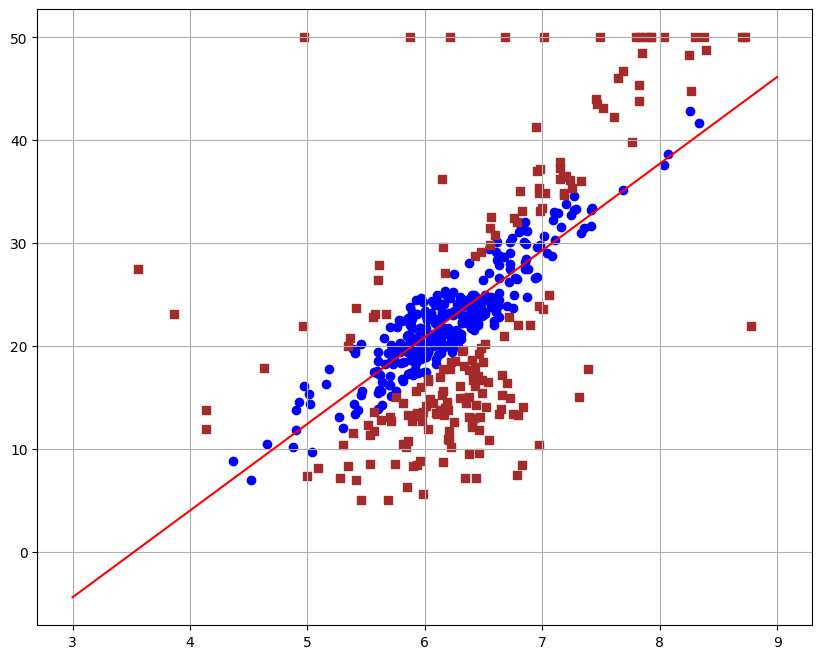

In [63]:
plt.figure(figsize=(10,8))
plt.grid()
plt.scatter(x[inlier_mask],y[inlier_mask],c='blue',marker='o',label='inliers')
plt.scatter(x[outlier_mask],y[outlier_mask],c='brown',marker='s',label='outliers')
plt.plot(line_x,line_y,color='red')
plt.show()

In [65]:
print(ransac.estimator_.coef_)
print(ransac.estimator_.intercept_)

[8.42734642]
-29.705983672768014


In [67]:
print(ransac.predict([[5]]))
print(ransac.predict(np.array([5]).reshape(1,-1)))

[12.43074843]
[12.43074843]
